# Computational Intelligence and Decision Making - Lab Work 1
#### Full Name: Ravinthiran Partheepan | Degree: Master's in Aritificial Intelligence | Semester: 1st / Year: 1st
## KNN Problem Statement:
Problem: based on the given data of historical real estate transactions create the decision-making model (DMM) which aims to predict prices of new real estate objects.

Project workflow:

- P1. Perform given data analysis and preprocessing
- P2. Implement K-Nearest Neighbors (KNN), Decision tree (DT), and random forest (RF) algorithms (You cannot use library functions for these algorithms)
- P3. Use implemented algorithms to create DMM for the given problem and evaluate the results.
- P4. Use “scikit-learn” (or other) library functions for the same algorithms and evaluate the results.
- P5. Write conclusions.

## Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

## Data Import

In [2]:
read_hist_csv = pd.read_csv("C:/Users/ravin/KTU/CI-DM/Task 1/Datasets/Task 1/historicalData.tsv", sep="\t")
read_hist_csv.head()

,Id,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,1,65.0,8450,Pave,CollgCr,2003,2003,Y,Y,Normal,208500
1,2,80.0,9600,Pave,Veenker,1976,1976,Y,Y,Normal,181500
2,3,68.0,11250,Pave,CollgCr,2001,2002,Y,Y,Normal,223500
3,4,60.0,9550,Pave,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,5,84.0,14260,Pave,NoRidge,2000,2000,Y,Y,Normal,250000


In [3]:
read_new_csv = pd.read_csv("C:/Users/ravin/KTU/CI-DM/Task 1/Datasets/Task 1/newData.tsv", sep="\t")
read_new_csv.head()                    

,Id,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,1000,64.0,6762,Pave,CollgCr,2006,2006,Y,Y,Normal,206000
1,1001,74.0,10206,Pave,Edwards,1952,1952,N,Y,Normal,82000
2,1002,60.0,5400,Pave,OldTown,1920,1950,Y,N,Abnorml,86000
3,1003,75.0,11957,Pave,Somerst,2006,2006,Y,Y,Normal,232000
4,1004,NaN,11500,Pave,NWAmes,1976,1976,Y,Y,Normal,136905


## Data type of features: LotFrontage, LotArea, Street,...SalePrice

In [4]:
print(read_hist_csv.dtypes)

Id                 int64
LotFrontage      float64
LotArea            int64
Street            object
Neighborhood      object
YearBuilt          int64
YearRemodAdd       int64
CentralAir        object
PavedDrive        object
SaleCondition     object
SalePrice          int64
dtype: object


In [5]:
print(read_new_csv.dtypes)

Id                 int64
LotFrontage      float64
LotArea            int64
Street            object
Neighborhood      object
YearBuilt          int64
YearRemodAdd       int64
CentralAir        object
PavedDrive        object
SaleCondition     object
SalePrice          int64
dtype: object


## Data Quality Test

In [6]:
# Checking for Missing values in HistoricalData 
check_hist_dat_null = read_hist_csv.isnull().sum()
print(check_hist_dat_null)

Id                 0
LotFrontage      173
LotArea            0
Street             0
Neighborhood       0
YearBuilt          0
YearRemodAdd       0
CentralAir         0
PavedDrive         0
SaleCondition      0
SalePrice          0
dtype: int64


In [7]:
# Checking for missing values in NewData
check_new_dat = read_new_csv.isnull().sum()
print(check_new_dat)

Id                0
LotFrontage      86
LotArea           0
Street            0
Neighborhood      0
YearBuilt         0
YearRemodAdd      0
CentralAir        0
PavedDrive        0
SaleCondition     0
SalePrice         0
dtype: int64


## Missing Value Imputation

In [8]:
# Historical Data NaN imputation
# Dropping the rows with NaN would eliminate large protions of data because since there are 173 cells in the LotFrontage features has NaN
# So imputing those missing values with value 0

fill_na_hist = read_hist_csv.fillna(read_hist_csv.median()) #Median
check_Hist_NaN = fill_na_hist.isnull().sum()
print(check_Hist_NaN)

Id               0
LotFrontage      0
LotArea          0
Street           0
Neighborhood     0
YearBuilt        0
YearRemodAdd     0
CentralAir       0
PavedDrive       0
SaleCondition    0
SalePrice        0
dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\2933457410.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_na_hist = read_hist_csv.fillna(read_hist_csv.median()) #Median


In [9]:
# NewData NaN Imputation
fill_na_new = read_new_csv.fillna(0)
check_New_NaN = fill_na_new.isnull().sum()
print(check_New_NaN)

Id               0
LotFrontage      0
LotArea          0
Street           0
Neighborhood     0
YearBuilt        0
YearRemodAdd     0
CentralAir       0
PavedDrive       0
SaleCondition    0
SalePrice        0
dtype: int64


In [10]:
# Dropping the ID field
read_hist_csv.drop(['Id'], axis=1, inplace=True)

## Correlation Analysis

C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\1103431315.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(read_hist_csv.corr(), annot=True)


<Axes: >

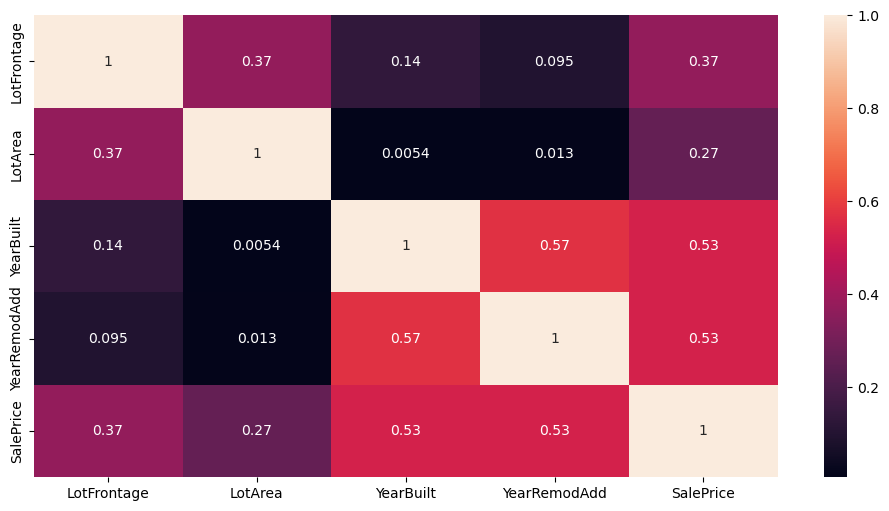

In [11]:
# Implementing correlation to understand the dependency between each feaure whether it is positively corrleated or negative correlated
plt.figure(figsize=(12,6))
sns.heatmap(read_hist_csv.corr(), annot=True)

## Checking for Duplicates

In [12]:
# Histroical Data Feature Duplication Check
duplicate_hist = read_hist_csv[read_hist_csv.duplicated()]
print(duplicate_hist)

Empty DataFrame
Columns: [LotFrontage, LotArea, Street, Neighborhood, YearBuilt, YearRemodAdd, CentralAir, PavedDrive, SaleCondition, SalePrice]
Index: []


In [13]:
duplicate_new = read_new_csv[read_new_csv.duplicated()]
print(duplicate_new)

Empty DataFrame
Columns: [Id, LotFrontage, LotArea, Street, Neighborhood, YearBuilt, YearRemodAdd, CentralAir, PavedDrive, SaleCondition, SalePrice]
Index: []


## Outlier Analysis

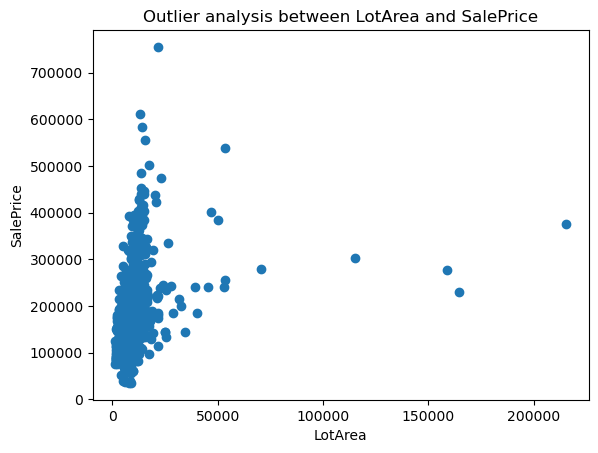

In [14]:
scat_outlier = plt.scatter(read_hist_csv["LotArea"], read_hist_csv["SalePrice"])
plt.title("Outlier analysis between LotArea and SalePrice")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

array([[<Axes: title={'center': 'LotArea'}, xlabel='[LotFrontage]'>,
        <Axes: title={'center': 'SalePrice'}, xlabel='[LotFrontage]'>],
       [<Axes: title={'center': 'YearBuilt'}, xlabel='[LotFrontage]'>,
        <Axes: title={'center': 'YearRemodAdd'}, xlabel='[LotFrontage]'>]],
      dtype=object)

<Figure size 1000x700 with 0 Axes>

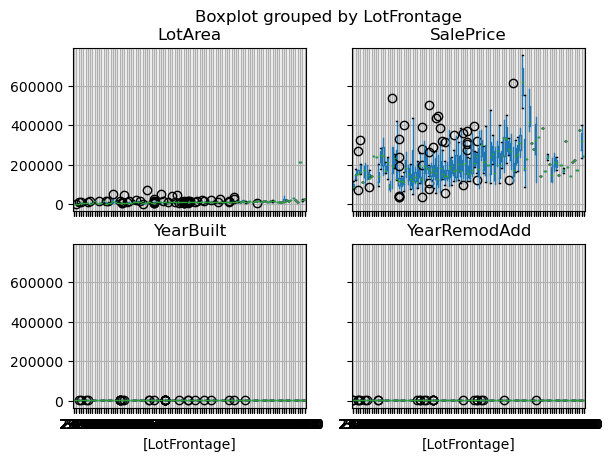

In [15]:
# Outlier analysis using Box-Plot
scale_fig = plt.figure(figsize=(10,7))
read_hist_csv.boxplot(by="LotFrontage")

<Axes: title={'center': 'SalePrice'}, xlabel='LotArea'>

<Figure size 1000x700 with 0 Axes>

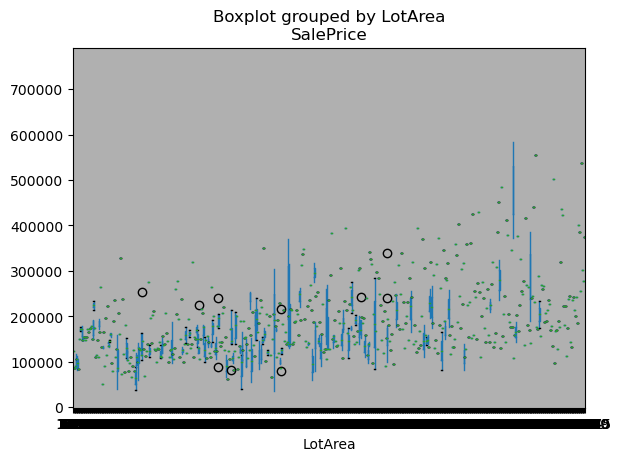

In [16]:
scale_fig = plt.figure(figsize=(10,7))
read_hist_csv.boxplot(by="LotArea", widths= 1.0, column=["SalePrice"])

## Data Distribution

Text(0, 0.5, 'Frequency')

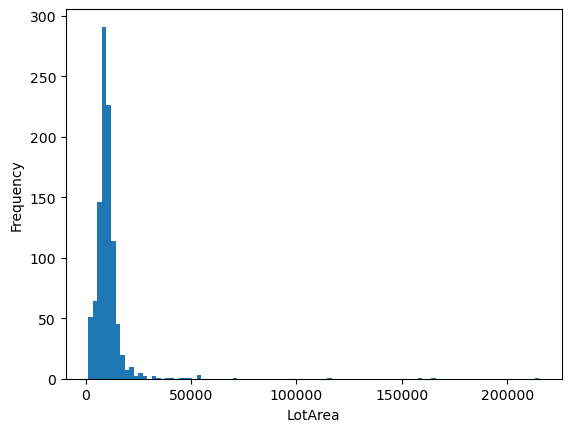

In [17]:
plt.hist(read_hist_csv["LotArea"], bins=100)
plt.xlabel("LotArea")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

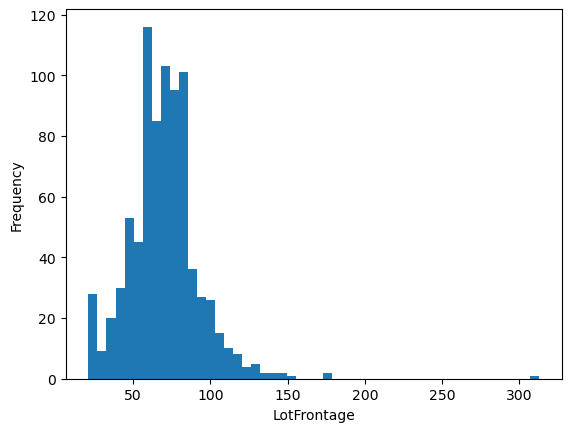

In [18]:
plt.hist(read_hist_csv["LotFrontage"], bins=50)
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

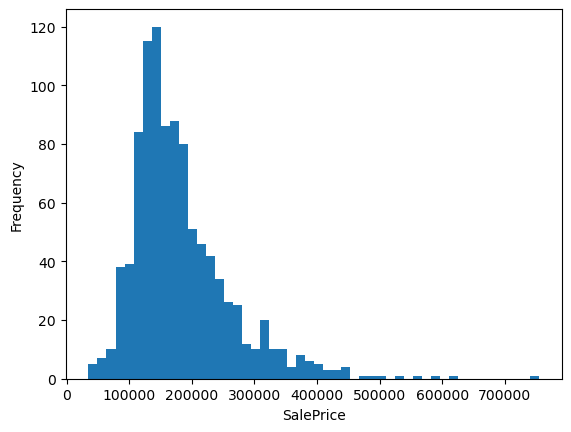

In [19]:
plt.hist(read_hist_csv["SalePrice"], bins=50)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

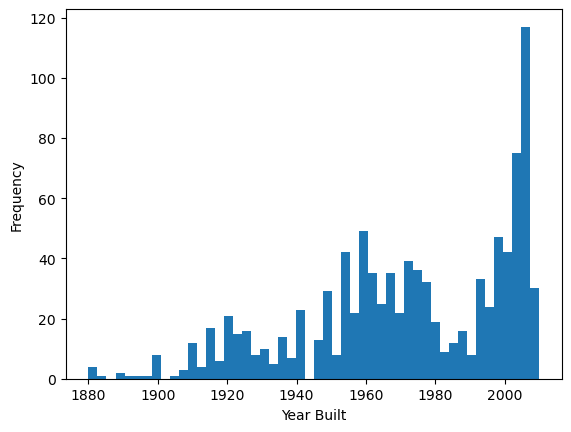

In [20]:
plt.hist(read_hist_csv["YearBuilt"], bins=50)
plt.xlabel("Year Built")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

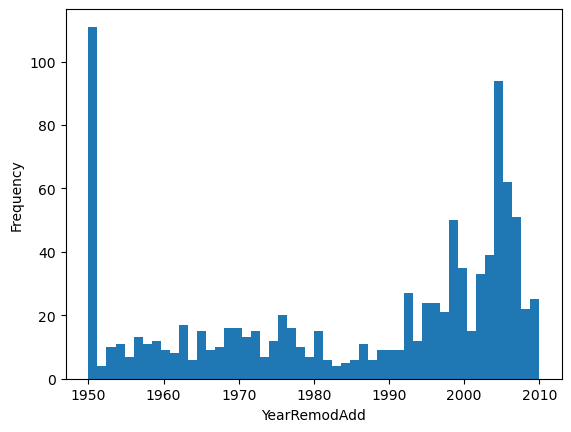

In [21]:
plt.hist(read_hist_csv["YearRemodAdd"], bins=50)
plt.xlabel("YearRemodAdd")
plt.ylabel("Frequency")

### Derived Feature between [YearBuilt - YearRemodAdd]

In [22]:
# The features = [YearBuilt, YearRemoteAdd] share strong positive corrleation with value 0.57
# We can create derived features for finding the difference between the two features using [YearBuilt-YearRemoteAdd]
# Note: RemoteYearAdd feature states the year of rennovation / remodelling performed

read_hist_csv["derived_features"] = read_hist_csv["YearRemodAdd"] - read_hist_csv["YearBuilt"]
print(read_hist_csv["derived_features"])

0       0
1       0
2       1
3      55
4       0
       ..
994     1
995     4
996     0
997     0
998    28
Name: derived_features, Length: 999, dtype: int64


Text(0, 0.5, 'Frequency')

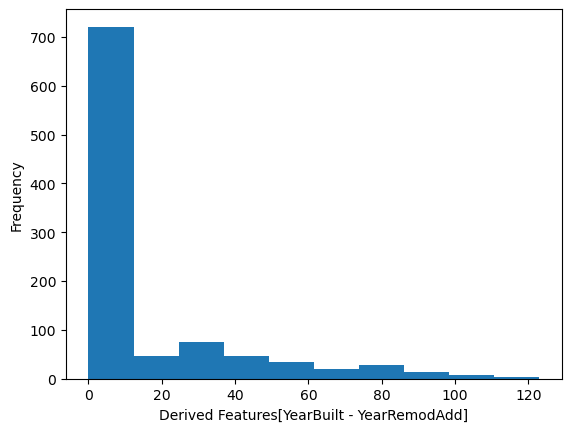

In [23]:
plt.hist(read_hist_csv["derived_features"], bins=10)
plt.xlabel("Derived Features[YearBuilt - YearRemodAdd]")
plt.ylabel("Frequency")

## Train-Test Dataset Split

In [50]:
features = ['LotFrontage', 'LotArea', 'Street', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'CentralAir', 'PavedDrive', 'SaleCondition']
X = read_new_csv[features]
y = read_new_csv['SalePrice']

In [51]:
# Missing values
feature_na = ['LotFrontage']
numeric_imputer = SimpleImputer(strategy='median')
for elements in feature_na:
    X[elements] = numeric_imputer.fit_transform(X[[elements]])

check_new_dat = X.isnull().sum()
print(check_new_dat)

LotFrontage      0
LotArea          0
Street           0
Neighborhood     0
YearBuilt        0
YearRemodAdd     0
CentralAir       0
PavedDrive       0
SaleCondition    0
dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\2595087311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[elements] = numeric_imputer.fit_transform(X[[elements]])


### Encoding categorical features

In [52]:
label_encoders = {}
categorical_columns = ['Street', 'Neighborhood', 'CentralAir', 'PavedDrive', 'SaleCondition']
for col in categorical_columns:
    lab_encode = LabelEncoder()
    X[col] = lab_encode.fit_transform(X[col])
    label_encoders[col] = lab_encode

C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\377571960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = lab_encode.fit_transform(X[col])
C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\377571960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = lab_encode.fit_transform(X[col])
C:\Users\ravin\AppData\Local\Temp\ipykernel_8868\377571960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Normalization for Features = [ LotArea, LotFrontage, SalesPrice,..]

In [54]:
# Using standard scaler to normalize kurtosis - Sales price
# LotArea and LotFrontage Follows Gaussian Distribution so there's no need to perform normalization
# Since the Price feature follow kurtosis we use log-scaling

normalize = StandardScaler() # Z-Score Normalization
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

## P2. Implementation of KNN

In [90]:
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)
knn_hyper_opt = GridSearchCV(knn_regressor, {'n_neighbors': [1,2,3,4,5]}, cv=4, scoring="neg_mean_absolute_error")
knn_hyper_opt.fit(X_train, y_train)
hyper_param_result = knn_hyper_opt.best_estimator_
print("KNN Hyperparameter optimal choice: ", hyper_param_result)

# Making predictions on the test dataset
knn_predictions = knn_regressor.predict(X_test[[0,1,2]])
print(knn_predictions)

KNN Hyperparameter optimal choice:  KNeighborsRegressor()
[215000. 119500. 137500.]


Text(0.5, 1.0, 'KNN Regression')

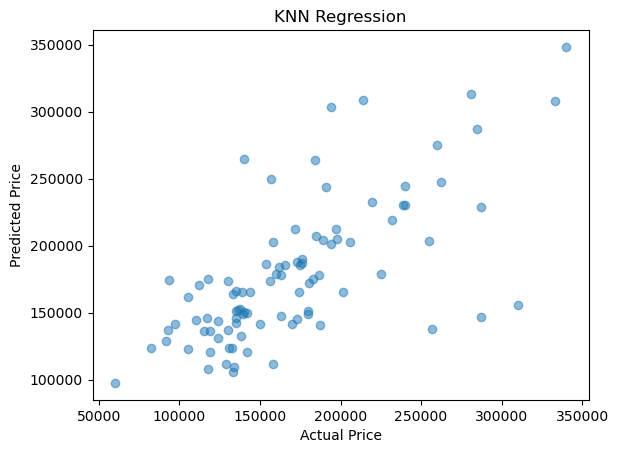

In [79]:
plt.subplot()
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression")

## P2. Implementation of Decision Tree

In [59]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
dt_hyper_opt = GridSearchCV(decision_tree_regressor, {'min_samples_leaf': [1,2,3,4,5], 'max_depth': [10,20,30,40,50]}, cv=4, scoring="neg_mean_absolute_error")
dt_hyper_opt.fit(X_train, y_train)
hyper_param_result = dt_hyper_opt.best_estimator_
print("Decision Tree Hyperparameter optimal choice: ", hyper_param_result)

# Making predictions on the test set
dt_predictions = decision_tree_regressor.predict(X_test)

Decision Tree Hyperparameter optimal choice:  DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=42)


Text(0.5, 1.0, 'Decision Tree Regression')

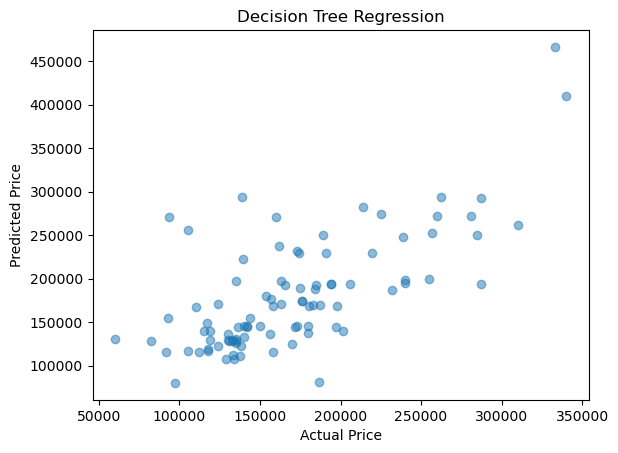

In [60]:
plt.subplot()
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regression")

## P2. Implementation of Random Forest

In [61]:
random_forest_regressor = RandomForestRegressor(n_estimators=150, random_state=42)
random_forest_regressor.fit(X_train, y_train)
rf_hyper_opt = GridSearchCV(random_forest_regressor, {'n_estimators': [100,150,200,250]}, cv=4, scoring="neg_mean_absolute_error")
rf_hyper_opt.fit(X_train, y_train)
hyper_param_result = rf_hyper_opt.best_estimator_
print("Random Forest Hyperparameter optimal choice: ", hyper_param_result)


# Making predictions on the test set
rf_predictions = random_forest_regressor.predict(X_test)

Random Forest Hyperparameter optimal choice:  RandomForestRegressor(random_state=42)


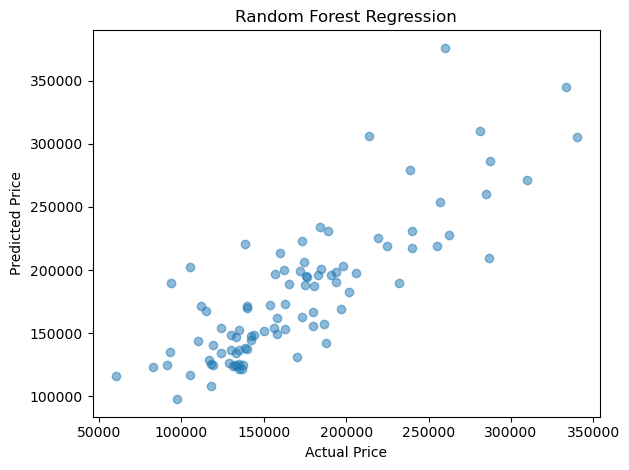

In [62]:
plt.subplot()
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Regression")
plt.tight_layout()
plt.show()

## Feature Importance Analysis

Text(0.5, 1.0, 'Random Forest Feature Importance')

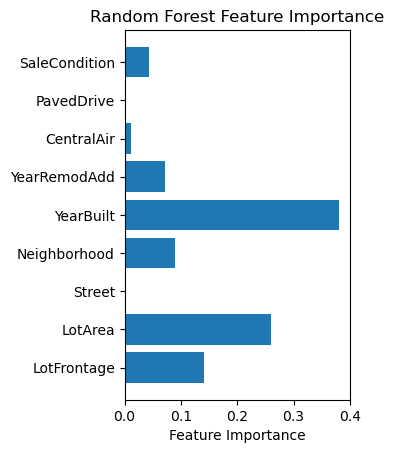

In [63]:
rf_feature_importance = random_forest_regressor.feature_importances_
plt.subplot(122)
plt.barh(features, rf_feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")

## Evaluation models using MAE, MAPE metrics

KNN Regressor MAE:  31036.185483870966
KNN Regressor MAPE 0.19825057929584816
DT Regressor MAE:  33542.89247311828
DTRegressor MAPE 0.2226300333179049
RF Regressor MAE:  24512.98761563406
RF Regressor MAPE 0.16378302920316148


Text(0.5, 1.0, 'Mean Absolute Error')

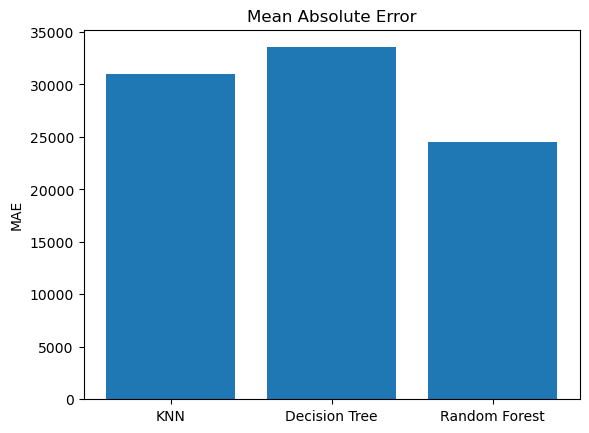

In [80]:
# MAE and MAPE evaluation of KNN Model
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mape = mean_absolute_percentage_error(y_test, knn_predictions)

print("KNN Regressor MAE: ", knn_mae)
print("KNN Regressor MAPE", knn_mape)

# MAE and MAPE evaluation of Decision Tree Model
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)

print("DT Regressor MAE: ", dt_mae)
print("DTRegressor MAPE", dt_mape)

# MAE and MAPE evaluation of Random Forest Model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

print("RF Regressor MAE: ", rf_mae)
print("RF Regressor MAPE", rf_mape)

# Mean Absolute Error Visualization
trained_models = ["KNN", "Decision Tree", "Random Forest"]
mae_scores = [knn_mae, dt_mae, rf_mae]

plt.subplot()
plt.bar(trained_models, mae_scores)
plt.ylabel("MAE")
plt.title("Mean Absolute Error")

Text(0.5, 1.0, 'Mean Absolute Percentage Error')

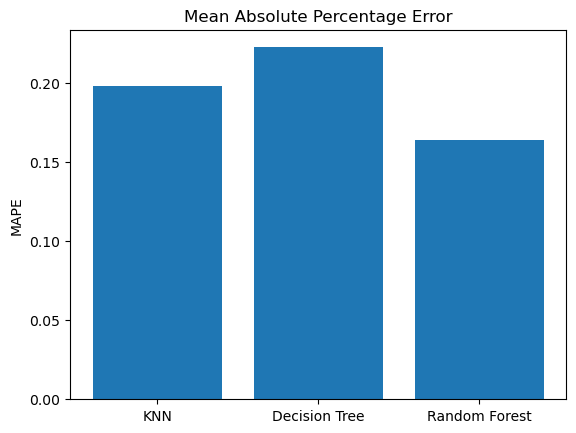

In [81]:
# Mean Absolute Percentage Error Visualization
trained_model_for_MAPE = ["KNN", "Decision Tree", "Random Forest"]
mape_scores = [knn_mape, dt_mape, rf_mape]

plt.subplot()
plt.bar(trained_models, mape_scores)
plt.ylabel("MAPE")
plt.title("Mean Absolute Percentage Error")

## Evaluate results using MSE, R^2 metrics

In [82]:
# Evaluation of KNN model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("KNN Regression MSE:", knn_mse)
print("KNN Regression R^2:", knn_r2)

KNN Regression MSE: 1910691744.0853496
KNN Regression R^2: 0.40637775516539465


In [67]:
# Evaluation of Decision Tree model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regression MSE:", dt_mse)
print("Decision Tree Regression R^2:", dt_r2)

Decision Tree Regression MSE: 2426467918.225806
Decision Tree Regression R^2: 0.24613410975621364


In [68]:
# Evaluation of Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression R^2:", rf_r2)

Random Forest Regression MSE: 1171820644.9447649
Random Forest Regression R^2: 0.6359335282894416


Text(0.5, 1.0, 'Mean Squared Error (MSE)')

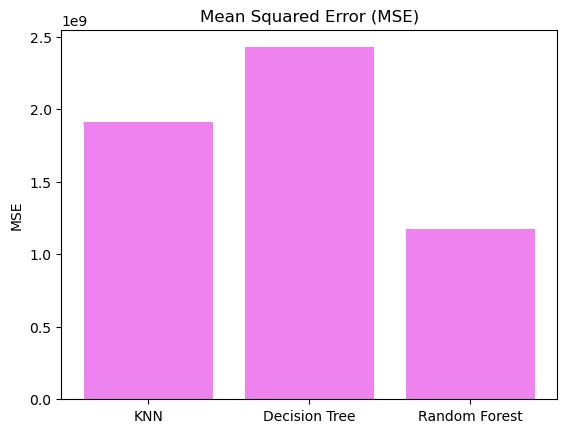

In [83]:
trained_models = ['KNN', 'Decision Tree', 'Random Forest']
mse_scores = [knn_mse, dt_mse, rf_mse]
r2_scores = [knn_r2, dt_r2, rf_r2]
plt.subplot()
plt.bar(trained_models, mse_scores, color='violet')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')

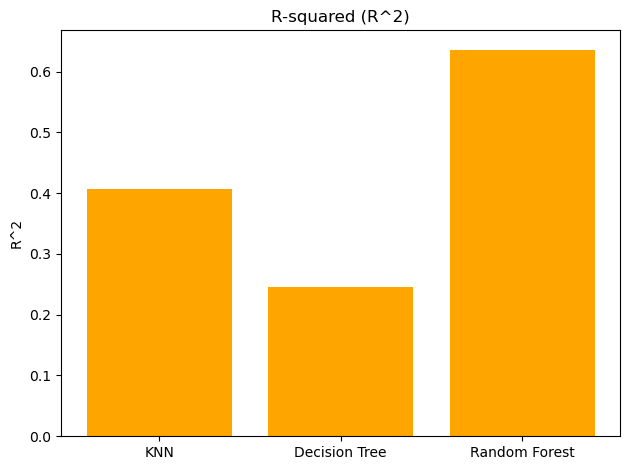

In [84]:
plt.subplot()
plt.bar(trained_models, r2_scores, color='orange')
plt.ylabel('R^2')
plt.title('R-squared (R^2)')
plt.tight_layout()
plt.show()

## House Price Prediction based on one-sample using Random Forest

In [85]:
# The X_test represents the testing data
# The array or list takes the rows as the input
sample_data = X_test[[0,1,2]]
predict_price = random_forest_regressor.predict(sample_data)
print("The predicted price for the sample is:", predict_price)

The predicted price for the sample is: [233869.14       108562.66666667  97895.66666667]


In [86]:
dt_sample_data = X_test[[0,1,2]]
dt_predict_price = decision_tree_regressor.predict(dt_sample_data)
print("The predicted price for the sample is:", dt_predict_price)

The predicted price for the sample is: [187500. 119500.  80000.]


In [87]:
knn_sample_data = X_test[[0,1,2]]
knn_predict_price = knn_regressor.predict(knn_sample_data)
print("The predicted price for the sample is:", knn_sample_data)

The predicted price for the sample is: [[-0.41478304  0.9048499   0.05219958 -0.6562506   1.07449526  0.98823907
   0.2757234   0.29449687  0.17121574]
 [-1.96020519 -1.42332996  0.05219958 -1.68537086  0.05357738 -0.58465415
   0.2757234   0.29449687  0.17121574]
 [-1.96020519 -1.44830386  0.05219958 -0.31321051 -0.01022999  1.13122936
   0.2757234   0.29449687  0.17121574]]


## Conclusion

- Based on the above results, Random Forest model has lower rate of Mean Squared Error (Sqaured difference between the actual value and the predicted value) with value 1.8 compared to Decision Tree and KNN Models.

- [1] From R-Squared evaluation metric perspective, Random Forest produced 0.7 units compared to KNN = 0.67, and Decision Tree = 0.41 which indicates Random Forest model analyzed there is a high correlation between features which explains there is small difference between the actual value and fitted value or predicted value. 

Reference:

[1] https://statisticsbyjim.com/regression/interpret-r-squared-regression/